# 위치 추정

In [2]:
import pandas as pd

df = pd.read_csv('./datasets/state.csv')

In [3]:
df['Population'].mean()

6162876.3

In [4]:
df['Population'].median()

4436369.5

In [5]:
from scipy.stats import trim_mean

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
trim_mean(df['Population'], 0.1)

4783697.125

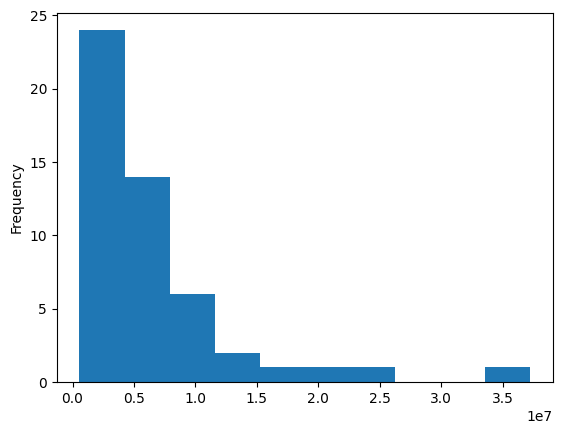

In [7]:
df['Population'].plot(kind='hist');

In [8]:
import numpy as np

In [9]:
np.average(df['Murder.Rate'], weights=df['Population'])

4.445833981123393

In [10]:
df['Murder.Rate'].mean()

4.066

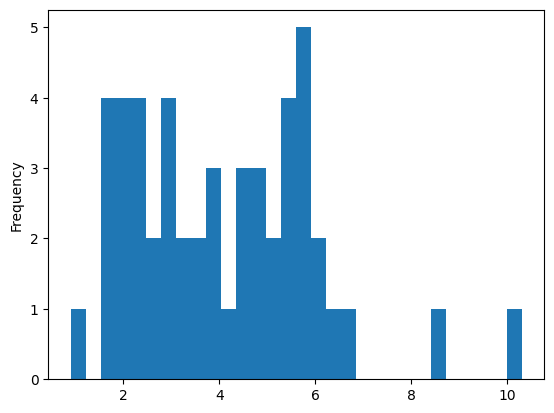

In [11]:
df['Murder.Rate'].plot(kind='hist', bins=30);

# 변이 추정

In [12]:
df['Population'].std()

6848235.347401142

In [13]:
np.std(df['Population'].values)

6779407.114632265

In [14]:
np.std(df['Population'].values, ddof=1)

6848235.347401142

In [15]:
df['Population'].quantile(0.75) - df['Population'].quantile(0.25)

4847308.0

In [16]:
from statsmodels.robust.scale import mad

In [17]:
mad(df['Population'])

3849876.1459979336

# 데이터 분포 탐색하기

In [18]:
df['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.72, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.72    5.328
0.95    6.510
Name: Murder.Rate, dtype: float64

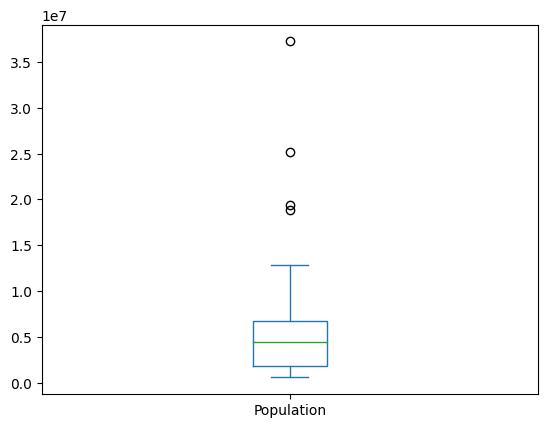

In [19]:
df['Population'].plot(kind='box');

In [20]:
binnedPopulation = pd.cut(df['Population'], 10)
binnedPopulation

0       (4232659.0, 7901692.0]
1       (526935.67, 4232659.0]
2       (4232659.0, 7901692.0]
3       (526935.67, 4232659.0]
4     (33584923.0, 37253956.0]
5       (4232659.0, 7901692.0]
6       (526935.67, 4232659.0]
7       (526935.67, 4232659.0]
8     (15239758.0, 18908791.0]
9      (7901692.0, 11570725.0]
10      (526935.67, 4232659.0]
11      (526935.67, 4232659.0]
12    (11570725.0, 15239758.0]
13      (4232659.0, 7901692.0]
14      (526935.67, 4232659.0]
15      (526935.67, 4232659.0]
16      (4232659.0, 7901692.0]
17      (4232659.0, 7901692.0]
18      (526935.67, 4232659.0]
19      (4232659.0, 7901692.0]
20      (4232659.0, 7901692.0]
21     (7901692.0, 11570725.0]
22      (4232659.0, 7901692.0]
23      (526935.67, 4232659.0]
24      (4232659.0, 7901692.0]
25      (526935.67, 4232659.0]
26      (526935.67, 4232659.0]
27      (526935.67, 4232659.0]
28      (526935.67, 4232659.0]
29     (7901692.0, 11570725.0]
30      (526935.67, 4232659.0]
31    (18908791.0, 22577824.0]
32     (

In [21]:
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [22]:
df['binnedPopulation'] = binnedPopulation

In [23]:
# Table 1.5
binnedPopulation.name = 'binnedPopulation'
df_tmp = df.sort_values(by='Population')

In [24]:
groups = []
for group, subset in df_tmp.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
display(pd.DataFrame(groups))

,BinRange,Count,States
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


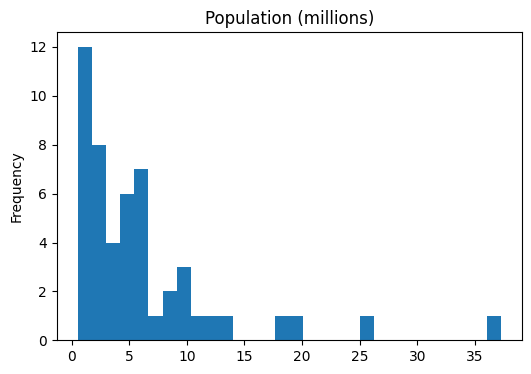

In [25]:
ax = (df['Population']/1_000_000).plot(kind='hist', figsize=(6,4), bins=30)
ax.set_title('Population (millions)');

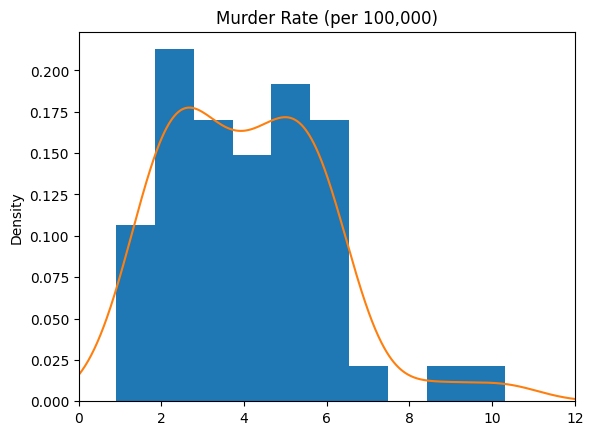

In [26]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12])
df['Murder.Rate'].plot.density(ax=ax)
ax.set_title('Murder Rate (per 100,000)');

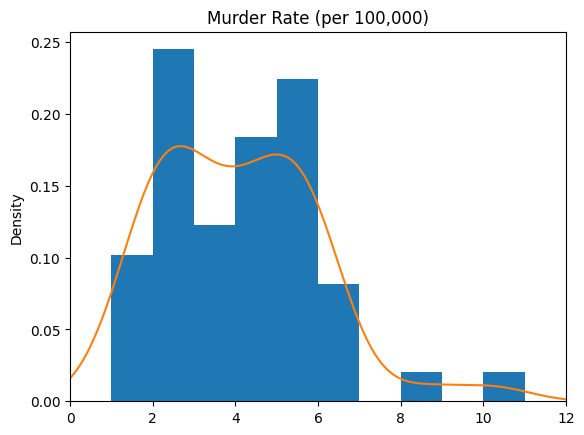

In [27]:
ax = df['Murder.Rate'].plot.hist(density=True, xlim=[0,12], bins=range(1, 12))
df['Murder.Rate'].plot.density(ax=ax)
ax.set_title('Murder Rate (per 100,000)');

# 이진 데이터와 범주 데이터 탐색하기

In [28]:
df = pd.read_csv('./datasets/dfw_airline.csv')
df

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


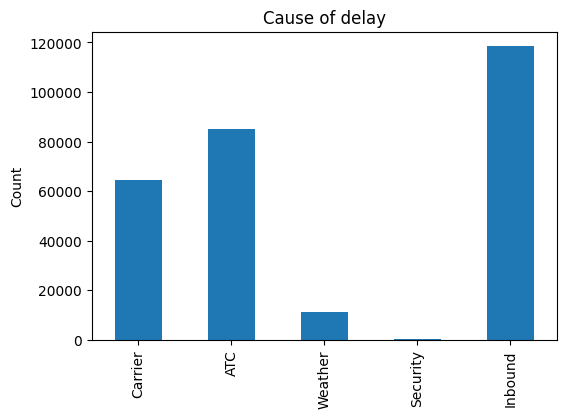

In [29]:
ax = df.T.plot.bar(figsize=(6,4), legend=False)
ax.set_title('Cause of delay')
ax.set_ylabel('Count');

# 상관관계

In [30]:
SP500_DATA_CSV = './datasets/sp500_data.csv.gz'
SP500_SECTORS_CSV = './datasets/sp500_sectors.csv'

sp500_sym = pd.read_csv(SP500_SECTORS_CSV)
sp500_px = pd.read_csv(SP500_DATA_CSV, index_col=0)
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

# Filter data for dates July 2012 through June 2015
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

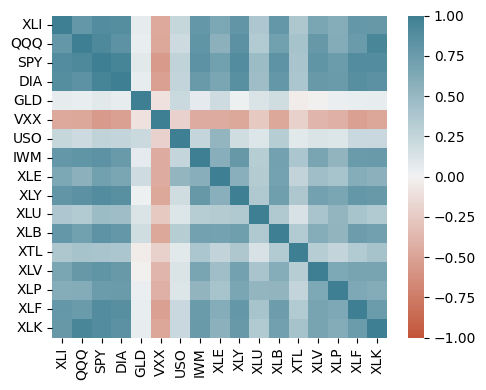

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

plt.tight_layout()
plt.show()

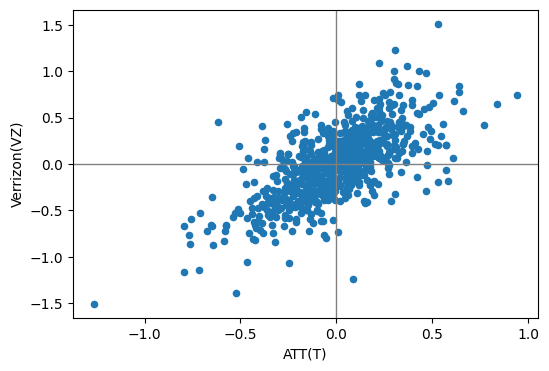

In [33]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(6, 4), marker='o')
ax.set_xlabel('ATT(T)')
ax.set_ylabel('Verrizon(VZ)')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1);

# 두 개 이상의 변수 탐색하기

In [34]:
kc_tax = pd.read_csv('./datasets/kc_tax.csv.gz')
df = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(df.shape)

(432693, 3)


In [35]:
df.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


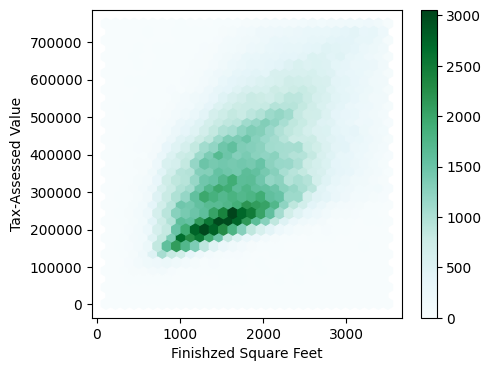

In [36]:
ax = df.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', gridsize=30, sharex=False, figsize=(5,4))
ax.set_xlabel('Finishzed Square Feet')
ax.set_ylabel('Tax-Assessed Value');

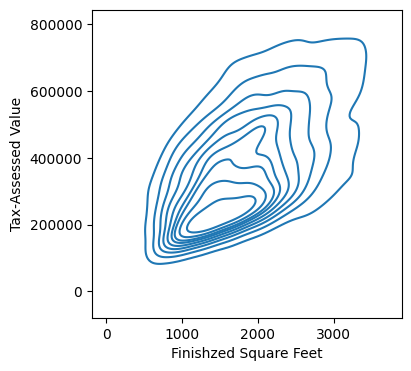

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,4))
ax = sns.kdeplot(data=df.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
ax.set_xlabel('Finishzed Square Feet')
ax.set_ylabel('Tax-Assessed Value');

In [40]:
df = pd.read_csv('./datasets/lc_loans.csv')
df.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [44]:
df['status'].value_counts()

Current        321185
Fully Paid      97316
Charged Off     22671
Late             9789
Name: status, dtype: int64

In [52]:
df_crosstab = pd.crosstab(index=df['grade'], columns=df['status'], margins=True)
df_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [57]:
df_tmp = df_crosstab.loc['A':'G', :].copy()
df_tmp.loc[:, 'Charged Off':'Late'] = df_tmp.loc[:, 'Charged Off':'Late'].div(df_tmp['All'], axis=0)
df_tmp['All'] = df_tmp['All'] / sum(df_tmp['All'])
df_tmp

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


In [64]:
df_perc = pd.concat([df_crosstab, df_tmp])
df_perc.loc[df_crosstab.index]

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562.000000,50051.000000,20408.000000,469.000000,72490.000000
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,5302.000000,93852.000000,31160.000000,2056.000000,132370.000000
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,6023.000000,88928.000000,23147.000000,2777.000000,120875.000000
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,5007.000000,53281.000000,13681.000000,2308.000000,74277.000000
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,2842.000000,24639.000000,5949.000000,1374.000000,34804.000000


In [69]:
df = pd.read_csv('./datasets/airline_stats.csv')
df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


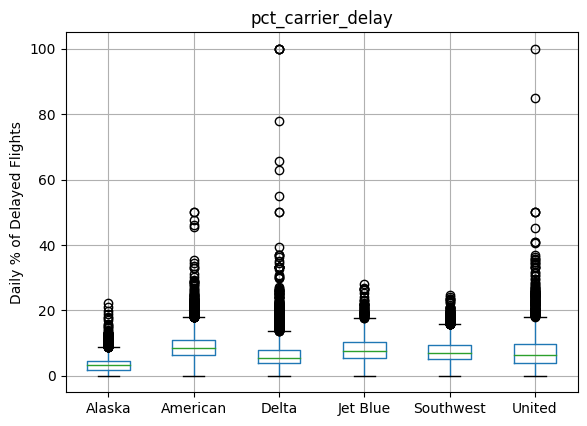

In [74]:
ax = df.boxplot(by='airline', column='pct_carrier_delay')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('');

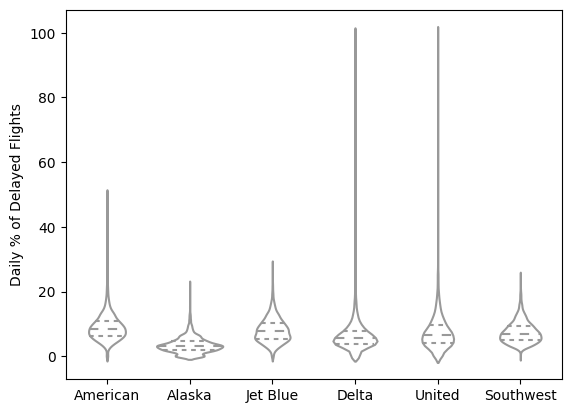

In [77]:
ax = sns.violinplot(data=df, x='airline', y='pct_carrier_delay', inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.show()

# 마치며